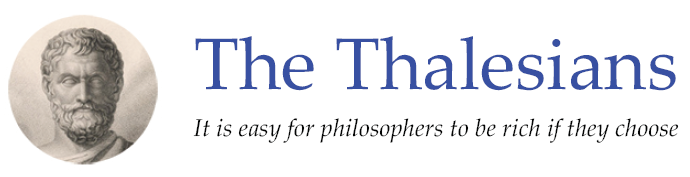

In [1]:
# Copyright (c) Thalesians Ltd, 2018-2019. All rights reserved
# Copyright (c) Paul Alexander Bilokon, 2018-2019. All rights reserved
# Author: Paul Alexander Bilokon <paul@thalesians.com>
# Version: 1.0 (2018.08.03)
# Email: education@thalesians.com
# Platform: Tested on Windows 10 with Python 3.6

# Linear algebra

## Motivation

In data science, machine learning (ML), and artificial intelligence (AI), we usually deal not with single numbers but with *multivariate* lists of numbers &mdash; mathematically speaking, **vectors**, &mdash; and *multivariate* tables of numbers &mdash; mathematically speaking, **matrices**. Therefore we solve *multivariate* equations, apply *multivariate* calculus to find optima of *multivariate* functions, etc.

The branch of mathematics that studies vectors, matrices, and related mathematical objects is called **linear algebra**. It is one of the most practically useful areas of mathematics in applied work and a prerequisite for data science, machine learning (ML), and artificial intelligence (AI).

## Objectives

* To consider numbers as examples of mathematical objects.
* To introduce a different kind of mathematical object &mdash; vector &mdash; first in two dimensions.
* To introduce vector arithmetics: vector addition and multiplication by scalars.
* To introduce the inner product and relate it to the angle between two vectors.
* To introduce the vector norm.
* To consider vectors in three dimensions.
* To consider vector spaces in general.

In [2]:
%matplotlib inline

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Numbers

In everyday life, we are used to doing arithmetics with numbers, such as

In [4]:
5 + 3

8

and

In [5]:
10 * 5

50

The numbers 5 and 3 are *mathematical objects*.

Indeed, when we think about mathematics, we probably think of **numbers** as the fundamental objects of study. Numbers used for counting, namely $1, 2, 3, 4, 5, \ldots$ (and so on) are called **natural numbers**. We say that they belong to the **set** (i.e. a collection of objects) of natural numbers, $\mathbb{N}$, and write $3 \in \mathbb{N}$ to indicate that, for example, 3 **belongs to** this set.

Not all numbers are quite as straightforward (quite as natural). For example, the number **zero** wasn't invented (discovered?) until much later than the natural numbers. We sometimes write $\{0\} \cup \mathbb{N}$ to denote the set containing precisely the natural numbers along with 0. That is, the set that is the **union** (denoted by $\cup$) of the set of natural numbers $\mathbb{N}$ and the **singleton** set (i.e. a set containing exactly one element) $\{0\}$. (In mathematics we often use curly brackets to define sets by enumerating their elements.)

Then, there are the negative numbers, $\ldots, -5, -4, -3, -2, -1$. These, together with 0 and the natural numbers are collectively referred to as **integers**, or are said to belong to the set of **integers**, denoted $\mathbb{Z}$.

Since every element of $\mathbb{N}$ is in $\mathbb{Z}$, we say that $\mathbb{N}$ is a **subset** of $\mathbb{Z}$, and write $\mathbb{N} \subseteq \mathbb{Z}$. Two sets $A$ and $B$ are said to be equal if $A \subseteq B$ and also $B \subseteq A$, in other words, if $A$ and $B$ contain exactly the same elements.

The negative number $-3$ is sometimes referred to as the **additive inverse** of $3$, because adding it to $3$ yields zero:

In [6]:
3 + (-3)

0

There are other, somewhat unnatural numbers, such as the **multiplicative inverse** of 3, $\frac{1}{3}$. When multiplied by its multiplicative inverse, a number yields not zero, but **one**, the **identity** or **unit**:

In [7]:
3 * (1 / 3)

1.0

The fractions, such as $\frac{1}{3}$, $\pi$, $e$, along with the integers, form a set of **real** numbers, $\mathbb{R}$. Clearly, both $\mathbb{N}$ and $\mathbb{Z}$ are subsets of $\mathbb{R}$.

Real numbers obey certain rules (in mathematics we say **axioms**) of arithmetics, e.g. multiplication is **distributive** over addition:

In [8]:
3 * (0.5 + 100) == 3 * 0.5 + 3 * 100

True

To find out more about these rules, read Harold Davenport's book *The Higher Arithmetic*: https://www.amazon.co.uk/Higher-Arithmetic-Introduction-Theory-Numbers/dp/0521722365

## Vectors in two dimensions

One can think of other kinds of mathematical objects. They may or may not be composed of numbers. In order to specify the location of a point on a two-dimensional plane you need a mathematical object composed of *two* different numbers: the $x$- and $y$-coordinates. Such a **point** may be given by a single mathematical object, $\mathbf{v} = \begin{pmatrix} 3 \\ 5 \end{pmatrix}$, where we understand that the first number specifies the $x$-coordinate, while the second the $y$-coordinate &mdash; the order of numbers in this pair matters.

We can visualise this mathematical object by means of a plot:

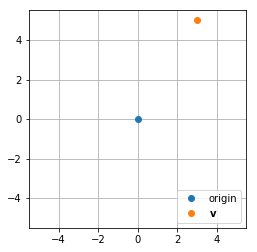

In [9]:
plt.plot(0, 0, 'o', label='origin')
plt.plot(3, 5, 'o', label='$\mathbf{v}$')
plt.axis([-5.5, 5.5, -5.5, 5.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.legend(loc='lower right');

It may be useful to think of this object, $\begin{pmatrix} 3 \\ 5 \end{pmatrix}$, which we shall call a **vector**, as *displacement* from the **origin**, $\begin{pmatrix} 0 \\ 0 \end{pmatrix}$. We can then read $\begin{pmatrix} 3 \\ 5 \end{pmatrix}$ as "go to the right (of the origin) by three units, and then go up (from the origin) by five units". Therefore vectors may be visualised by *arrows*, specifying a *direction*, as well as by *points*:

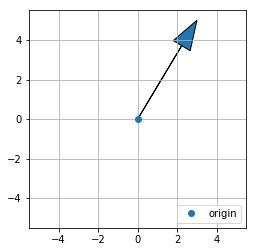

In [10]:
plt.plot(0, 0, 'o', label='origin')
plt.arrow(0, 0, 3, 5, shape='full', head_width=1, length_includes_head=True)
plt.axis([-5.5, 5.5, -5.5, 5.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.legend(loc='lower right');

Two-dimensional vectors are said to belong to a set called the **Euclidean 2-plane**, denoted $\mathbb{R}^2$. The set of real numbers, $\mathbb{R}$, is sometimes referred to as the **Euclidean real line**, and may also be written as $\mathbb{R}^1$ (although this is rarely done in practice).

## Vector arithmietics

Would it make sense to define **addition** for vectors? And if it would, how would we define it? Thinking of vectors as displacements gives us a clue: the sum of two vectors, $\mathbf{u}$ and $\mathbf{v}$, could be defined by "go in the direction specified by $\mathbf{u}$, then in the direction specified by $\mathbf{v}$".

If, for example, $\mathbf{u} = \begin{pmatrix} 5 \\ 3 \end{pmatrix}$ and $\mathbf{v} = \begin{pmatrix} 4 \\ 6 \end{pmatrix}$, then their sum would be obtained as follows:
* Start at the origin.
* Move in the direction specified by $\mathbf{u}$: "go to the right by five units, and then go up by three units".
* Then move in the direction specified by $\mathbf{v}$: "go to the right by four units, and then go up by six units".

The end result?

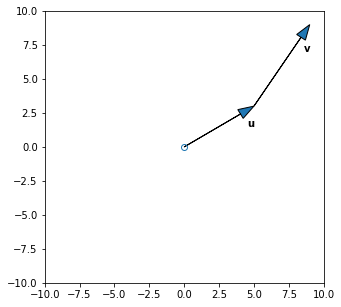

In [11]:
u = np.array((5, 3))
v = np.array((4, 6))
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', u + (-.5, -1.5))
plt.arrow(u[0], u[1], v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', u + v + (-.5, -2.))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

Geometrically, we have appended the arrow representing the vector $\mathbf{v}$ to the end of the arrow representing the vector $\mathbf{u}$ drawn starting at the origin.

What if we started at the origin, went in the direction specified by $\mathbf{v}$ and then went in the direction specified by $\mathbf{u}$? Where would we end up?

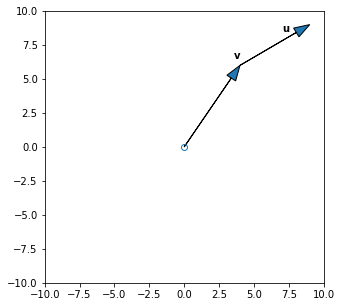

In [12]:
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', v + (-.5, .5))
plt.arrow(v[0], v[1], u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', v + u + (-2., -.5))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

We would end up in the same place! More generally, for any vectors $\mathbf{u}$ and $\mathbf{v}$, vector addition is **commutative**, in other words, $\mathbf{u} + \mathbf{v} = \mathbf{v} + \mathbf{u}$. Let us visualise this on a plot:

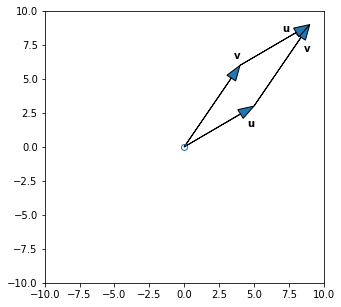

In [13]:
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', u + (-.5, -1.5))
plt.arrow(u[0], u[1], v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', u + v + (-.5, -2.))
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', v + (-.5, .5))
plt.arrow(v[0], v[1], u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', v + u + (-2., -.5))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

The sum $\mathbf{u} + \mathbf{v}$ (which, of course, is equal to $\mathbf{v} + \mathbf{u}$ since vector addition is commutative) is itself a vector, which is represented by the diagonal of the parallelogram formed by the arrows above:

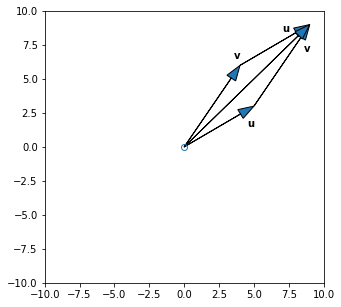

In [14]:
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', u + (-.5, -1.5))
plt.arrow(u[0], u[1], v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', u + v + (-.5, -2.))
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', v + (-.5, .5))
plt.arrow(v[0], v[1], u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', v + u + (-2., -.5))
plt.arrow(0, 0, u[0] + v[0], u[1] + v[1], head_width=.75, length_includes_head=True)
plt.xlim(-10, 10)
plt.ylim(-10, 10);

We observe that the sum of $\mathbf{u} = \begin{pmatrix} 5 \\ 3 \end{pmatrix}$ and $\mathbf{v} = \begin{pmatrix} 4 \\ 6 \end{pmatrix}$ is given by adding them **elementwise** or **coordinate-wise**: $\mathbf{u} + \mathbf{v} = \begin{pmatrix} 5 + 4 \\ 3 + 6 \end{pmatrix} = \begin{pmatrix} 9 \\ 9 \end{pmatrix}$.

It is indeed unsurprising that vector addition is commutative, since the addition of ordinary numbers is commutative: $$\mathbf{u} + \mathbf{v} = \begin{pmatrix} 5 + 4 \\ 3 + 6 \end{pmatrix} = \begin{pmatrix} 4 + 5 \\ 6 + 3 \end{pmatrix} = \mathbf{v} + \mathbf{u}.$$

## Scalar multiplication

Would it make sense to multiply a vector, such as $\mathbf{u} = \begin{pmatrix} 5 \\ 3 \end{pmatrix}$ by a number, say $\alpha = 1.5$ (we'll start referring to ordinary numbers as **scalars**)? A natural way to define **scalar multiplication** of vectors would also be elementwise:
$$\alpha \mathbf{u} = 1.5 \begin{pmatrix} 5 \\ 3 \end{pmatrix} = \begin{pmatrix} 1.5 \cdot 5 \\ 1.5 \cdot 3 \end{pmatrix} = \begin{pmatrix} 7.5 \\ 4.5 \end{pmatrix}.$$

How can we interpret this geometrically? Well, it turns out that we obtain a vector whose length is $1.5$ times that of $u$, and whose direction is the same as that of $u$:

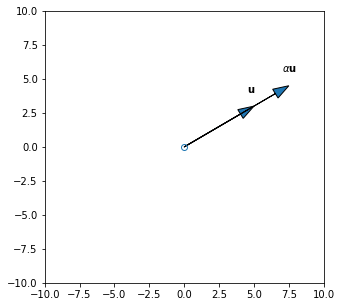

In [15]:
alpha = 1.5
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{u}$', u + (-.5, 1.))
plt.arrow(0, 0, alpha * u[0], alpha * u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\alpha \mathbf{u}$', alpha * u + (-.5, 1.))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

What if, instead, we multiplied $\mathbf{u}$ by $\beta = -1.5$? Well,
$$\beta \mathbf{u} = -1.5 \begin{pmatrix} 5 \\ 3 \end{pmatrix} = \begin{pmatrix} -7.5 \\ -4.5 \end{pmatrix}.$$

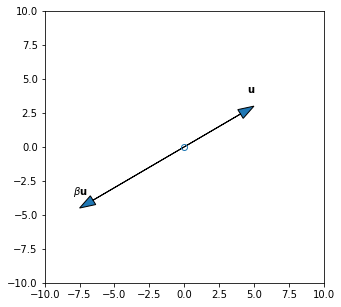

In [16]:
beta = -1.5
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{u}$', u + (-.5, 1.))
plt.arrow(0, 0, beta * u[0], beta * u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\beta \mathbf{u}$', beta * u + (-.5, 1.))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

Geometrically, we have obtained a vector whose length is $1.5$ times that of $\mathbf{u}$, and whose direction is the *opposite* (because $\beta$ is negative) to that of $\mathbf{u}$.

## The length of a vector: vector norm

By the way, how do we obtain the length of a vector? By Pythagoras's theorem, we add up the coordinates and take the square root:

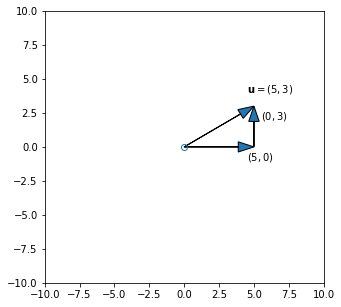

In [17]:
beta = -1.5
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{u} = (5, 3)$', u + (-.5, 1.))
plt.arrow(0, 0, u[0], 0, head_width=.75, length_includes_head=True)
plt.annotate(r'$(5, 0)$', np.array((u[0], 0)) + (-.5, -1.))
plt.arrow(u[0], 0, 0, u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$(0, 3)$', u + (.5, -1.))
#plt.annotate(r'$\mathbf{u}$', np.array((u[0], 0)) + (-.5, -1.))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

The resulting quantity, which is equal to the length of the vector, is called the **norm** of the vector and is denoted by
$$\|\mathbf{u}\| = \sqrt{u_1^2 + u_2^2} = \sqrt{5^2 + 3^2} = \sqrt{34} = 5.8309518... .$$

Notice that, in Python, we can use NumPy arrays to represent vectors:

In [18]:
u = np.array((5, 3))
u

array([5, 3])

In [19]:
v = np.array((4, 6))
v

array([4, 6])

NumPy "knows" the correct definition of vector addition:

In [20]:
u + v

array([9, 9])

In [21]:
v + u

array([9, 9])

It also knows the correct definition of multiplication of vectors by scalars:

In [22]:
alpha = 1.5
alpha * u

array([ 7.5,  4.5])

To obtain the norm of a vector, we can use

In [23]:
np.linalg.norm(u)

5.8309518948453007

## The inner product, the angle between two vectors

The **inner product** or **dot product** of two vectors is the sum of products of their respective coordinates:
$$\langle \mathbf{u}, \mathbf{v} \rangle = u_1 \cdot v_1 + u_2 \cdot v_2.$$

In particular, for $\mathbf{u} = (5, 3)$ and $\mathbf{v} = (4, 6)$, it is given by
$$\langle \mathbf{u}, \mathbf{v} \rangle = 5 \cdot 4 + 3 \cdot 6 = 38.$$

We can check our calculations using Python:

In [24]:
np.dot(u, v)

38

Geometrically speaking, the inner product, when appropriately normalised, gives the cosine of the angle in radians between two vectors:

In [25]:
u = np.array([3., 5.])
v = np.array([-2.83012702, 5.09807621])
angle = np.arccos(np.dot(u, v) / (np.sqrt(np.dot(u, u)) * np.sqrt(np.dot(v, v))))
angle

1.0471975514708565

In [26]:
angle / np.pi * 180.

60.000000015713866

Two vectors $\mathbf{u}$ and $\mathbf{v}$ are said to be **orthogonal** if
$$\langle \mathbf{u}, \mathbf{v} \rangle = 0.$$

It is easy to see that
$$\|\mathbf{u}\| = \sqrt{\langle \mathbf{u}, \mathbf{u} \rangle}.$$

It is also easy to notice that the inner product is **commutative**,
$$\langle \mathbf{u}, \mathbf{v} \rangle = \langle \mathbf{v}, \mathbf{u} \rangle.$$

Furthermore, if $\alpha$ is a scalar, then
$$\langle \alpha \mathbf{u}, \mathbf{v} \rangle = \alpha \langle \mathbf{u}, \mathbf{v} \rangle,$$
and
$$\langle \mathbf{u} + \mathbf{v}, \mathbf{w} \rangle = \langle \mathbf{u}, \mathbf{w} \rangle + \langle \mathbf{v}, \mathbf{w} \rangle;$$
these two properties together are referred to as **linearity in the first argument**.

The inner product is **positive-definite**. In other words, for all vectors $\mathbf{u}$,
$$\langle \mathbf{u}, \mathbf{u} \rangle \geq 0,$$
and
$$\langle \mathbf{u}, \mathbf{u} \rangle = 0$$
if and only if $\mathbf{u}$ is the **zero vector**, $\mathbf{0}$, i.e. the vector whose elements are all zero.

One can use the following formula to find the angle $\theta$ between two vectors $\mathbf{u}$ and $\mathbf{v}$:
$$\cos \theta = \frac{\langle \mathbf{u}, \mathbf{v} \rangle}{\|\mathbf{u}\| \|\mathbf{v}\|}.$$

Thus, in our example, with $\mathbf{u} = (5, 3)$ and $\mathbf{v} = (4, 6)$, the angle between the vectors is given by

In [27]:
np.arccos(np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v)))

1.0471975514708565

radians or

In [28]:
0.44237422297674489 / np.pi * 180.

25.34617594194669

degrees. We can visually verify that this is indeed true:

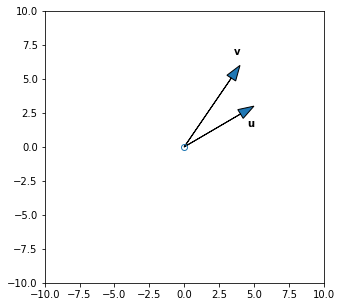

In [29]:
u = np.array((5, 3))
v = np.array((4, 6))
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{u}$', u + (-.5, -1.5))
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate('$\mathbf{v}$', v + (-.5, .75))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

## Vectors in three dimensions

So far, we have considered vectors that have two coordinates each, corresponding to coordinates on the two-dimensional plane. Instead, we could consider three-dimensional vectors, such as $\mathbf{a} = \begin{pmatrix} 3 \\ 5 \\ 7 \end{pmatrix}$ and $\mathbf{b} = \begin{pmatrix} 4 \\ 6 \\ 4 \end{pmatrix}$:

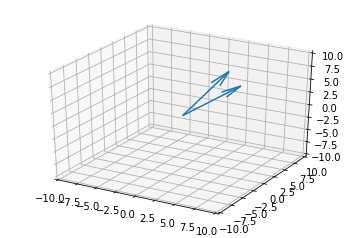

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_zlim((-10, 10))
ax.quiver(0, 0, 0, 3, 5, 7)
ax.quiver(0, 0, 0, 4, 6, 4);

In the three-dimensional case, vector addition and multiplication by scalars are defined elementwise, as before:

In [31]:
a = np.array((3., 5., 7.))
b = np.array((4., 6., 4.))
a + b

array([  7.,  11.,  11.])

In [32]:
alpha * a

array([  4.5,   7.5,  10.5])

In [33]:
beta = -alpha
beta * a

array([ -4.5,  -7.5, -10.5])

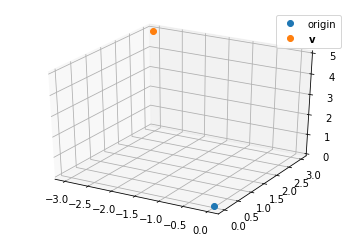

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0], [0], [0], 'o', label='origin')
ax.plot([-3], [3], [5], 'o', label='$\mathbf{v}$')
ax.legend();

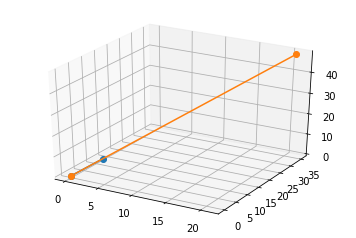

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0, a[0]], [0, a[1]], [0, a[2]], 'o-')
ax.plot([0, 7 * a[0]], [0, 7 * a[1]], [0, 7 * a[2]], 'o-');

## Vectors in general

We needn't restrict ourselves to three-dimensional vectors. We could easily define $c = (4, 7, 8, 2)$ and $d = (-12, 3, 7, 3)$, and do arithmetic element-wise, as before:

In [36]:
c = np.array((4, 7, 8, 2))
d = np.array((-12, 3, 7, 3))
c + d

array([-8, 10, 15,  5])

In [37]:
alpha * c

array([  6. ,  10.5,  12. ,   3. ])

In data science, we usually deal with tables of observations. Such as this table:

In [38]:
import pandas as pd
df = pd.DataFrame({
    'transaction date': [2012.917, 2012.917, 2013.583, 2013.500, 2012.833],
    'house age': [32.0, 19.5, 13.3, 13.3, 5.0],
    'distance to the nearest MRT station': [84.87882, 306.59470, 561.98450, 561.98450, 390.56840],
    'number of convenience stores': [10, 9, 5, 5, 5],
    'latitude': [24.98298, 24.98034, 24.98746, 24.98746, 24.97937],
    'longitude': [121.54024, 121.53951, 121.54391, 121.54391, 121.54245],
    'house price per unit area': [37.9, 42.2, 47.3, 54.8, 43.1]
}, columns=[
    'transaction date',
    'house age',
    'distance to the nearest MRT station',
    'number of convenience stores',
    'latitude',
    'longitude',
    'house price per unit area'
])
df

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price per unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Vectors are a natural way to represent table columns. In particular, if our goal is to predict (well, explain) house price per unit area using the other columns, we define the required outputs as a vector
$$\begin{pmatrix} 37.9 \\ 42.2 \\ 47.3 \\ 54.8 \\ 43.1 \end{pmatrix}.$$

In Python, vectors are implemented as NumPy arrays:

In [39]:
house_price = np.array([37.9, 42.2, 47.3, 54.8, 43.1])
house_price

array([ 37.9,  42.2,  47.3,  54.8,  43.1])

NumPy is one of the most commonly useful Python libraries, a workhorse underlying the work of many other libraries, such as Pandas.

Machine learning algorithms, such as linear regression, can then operate on this object to give us the desired results.

The problem is that we wouldn't be able to visualise four-dimensional vectors. (We can nonetheless gain some geometric intuition by "pretending" that we deal with familiar two- and three-dimensional spaces.

Notice that it would only make sense to talk about adding the vectors $u$ and $v$ if they have the same number of elements. In general, we talk about the **vector space** of two-dimensional vectors, $\mathbb{R}^2$, the vector space of three-dimensional vectors, $\mathbb{R}^3$, the vector space of four-dimensional vectors, $\mathbb{R}^4$, etc. and write $$(3, 5, 7) \in \mathbb{R}^3$$ meaning that the vector $(3, 5, 7)$ is an element of $\mathbb{R}^3$. It makes sense to talk about the addition of two vectors if they belong to the same vector space.

Mathematicians like abstraction. Indeed, much of the power of mathematics is in abstraction. The notions of a vector and vector space can be further generalised as follows.

Formally, a **vector space** over a field $F$ is a set $V$ together with two operations that satisfy the following eight axioms, the first four axioms stipulate the properties of vector addition alone, whereas the last four involve scalar multiplication:

* **A1**: Associativity of addition: $(u + v) + w = u + (v + w)$.
* **A2**: Commutativity of addition: $u + v = v + u$.
* **A3**: **Identity** element of addition: there exists an element $0 \in V$, called the **zero vector**, such that $0 + v = v$ for all $v \in V$.
* **A4**: **Inverse** elements of addition: $v + (-v) = 0$.
* **S1**: Distributivity of scalar multiplication over vector addition: $\alpha(u + v) = \alpha u + \alpha v$.
* **S2**: Distributivity of scalar multiplication over field addition: $(\alpha + \beta)v = \alpha v + \beta v$.
* **S3**: Compatibility of scalar multiplication with field multiplication: $\alpha (\beta v) = (\alpha \beta) v$.
* **S4**: **Identity** element of scalar multiplication, preservation of scale: $1 v = v$.



The special vectors, whose elements are all zeros,
$$\begin{pmatrix} 0 \\ 0 \end{pmatrix} \in \mathbb{R}^2, \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} \in \mathbb{R}^3, \ldots$$
are known as **zero** vectors, or **zeros** of their corresponding spaces $\mathbb{R}^2, \mathbb{R}^3, \ldots$.

These sets, when we think of them in conjunction with rules of arithmetics for vectors, are referred to as **vector spaces**.

In [40]:
np.zeros(3)

array([ 0.,  0.,  0.])

In [41]:
u = np.array((3., 5., 7.))
v = np.array((4., 6., 4.))
w = np.array((-3., -3., 10.))

In [42]:
(u + v) + w

array([  4.,   8.,  21.])

In [43]:
u + (v + w)

array([  4.,   8.,  21.])

In [44]:
(u + v) + w == u + (v + w)

array([ True,  True,  True], dtype=bool)

In [45]:
np.all((u + v) + w == u + (v + w))

True

In [46]:
np.all(u + v == v + u)

True

In [47]:
zero = np.array((0., 0., 0.))

In [48]:
np.all(zero + v == v)

True

In [49]:
np.all(np.array(v + (-v) == zero))

True

In [50]:
alpha = -5.
beta = 7.

In [51]:
np.all(alpha * (u + v) == alpha * u + alpha * v)

True

In [52]:
np.all((alpha + beta) * v == alpha * v + beta * v)

True

In [53]:
np.all(alpha * (beta * v) == (alpha * beta) * v)

True

In [54]:
np.all(1 * v == v)

True

In [55]:
u = lambda x: 2. * x

In [56]:
v = lambda x: x * x

In [57]:
w = lambda x: 3. * x + 1.

In [58]:
def plus(f1, f2):
    return lambda x: f1(x) + f2(x)

In [59]:
lhs = plus(plus(u, v), w)

In [60]:
rhs = plus(u, plus(v, w))

In [61]:
lhs

<function __main__.plus.<locals>.<lambda>>

In [62]:
rhs

<function __main__.plus.<locals>.<lambda>>

In [63]:
lhs(5.)

51.0

In [64]:
rhs(5.)

51.0

In [65]:
lhs(5.) == rhs(5.)

True

In [66]:
lhs(10.) == rhs(10.)

True

In [67]:
plus(u, v)

<function __main__.plus.<locals>.<lambda>>

In [68]:
plus(u, v)(5.)

35.0

In [69]:
plus(u, v)(5.) == plus(v, u)(5.)

True

In [70]:
def scalar_product(s, f):
    return lambda x: s * f(x)

In [71]:
lhs = scalar_product(alpha, plus(u, v))
rhs = plus(scalar_product(alpha, u), scalar_product(alpha, v))
lhs(5.) == rhs(5.)

True

In [72]:
u = np.array((4., 6.))
v = np.array((5., 3.))
alpha = -.5
beta = 2.
w = alpha * u + beta * v

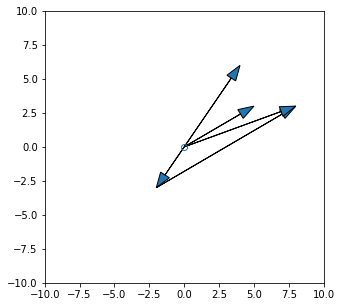

In [73]:
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.arrow(0, 0, alpha*u[0], alpha*u[1], head_width=.75, length_includes_head=True)
plt.arrow(alpha*u[0], alpha*u[1], beta*v[0], beta*v[1], head_width=.75, length_includes_head=True)
plt.arrow(0, 0, w[0], w[1], head_width=.75, length_includes_head=True)
plt.xlim(-10, 10)
plt.ylim(-10, 10);

In [74]:
w = np.array((-5., 2.5))

In [75]:
90-35

55

In [76]:
55/14

3.9285714285714284

In [77]:
3*14

42

In [78]:
55-42

13

In [79]:
(-55/14) * u + (15/7) * v

array([ -5.        , -17.14285714])

In [80]:
2.*u - 3.*v

array([-7.,  3.])

Now let us suppose that we are given a vector in two dimensions, say, $w = (-7, 3)$:

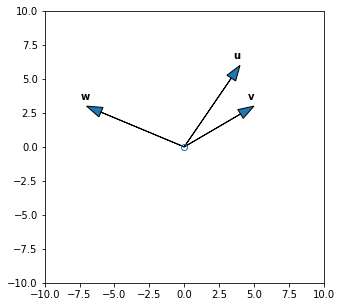

In [81]:
w = np.array((-7., 3.))
plt.figure(figsize=(5, 5))
plt.plot(0, 0, 'o', markerfacecolor='none')
plt.arrow(0, 0, u[0], u[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{u}$', u + (-.5, .5))
plt.arrow(0, 0, v[0], v[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{v}$', v + (-.5, .5))
plt.arrow(0, 0, w[0], w[1], head_width=.75, length_includes_head=True)
plt.annotate(r'$\mathbf{w}$', w + (-.5, .5))
plt.xlim(-10, 10)
plt.ylim(-10, 10);

A weighted (by scalars) sum of vectors is called a **linear combination**:
$$\alpha_1 \mathbf{v}_1 + \alpha_2 \mathbf{v}_2 + \alpha_3 \mathbf{v}_3 + \ldots + \alpha_k \mathbf{v}_k,$$
for example,
$$3.5 \begin{pmatrix} -3 \\ 3 \\ 5 \end{pmatrix} + 2.7 \begin{pmatrix} 25 \\ 7 \\ 13 \end{pmatrix} + 2.35 \begin{pmatrix} 1 \\ 1 \\ 1.5 \end{pmatrix}.$$

In [82]:
3.5 * np.array([-3., 3., 5.]) + 2.7 * np.array([25., 7., 13.]) + 2.35 * np.array([1., 1., 1.5])

array([ 59.35 ,  31.75 ,  56.125])

Vectors $\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_k$ are said to be **linearly independent** if none of them can be written as a linear combination of the remaining vectors. Thus
$$\begin{pmatrix} -3 \\ 3 \\ 5 \end{pmatrix}, \begin{pmatrix} 25 \\ 7 \\ 13 \end{pmatrix}, \begin{pmatrix} 1 \\ 1 \\ 1.5 \end{pmatrix}$$
are linearly independent, whereas
$$\begin{pmatrix} -3 \\ 3 \\ 5 \end{pmatrix}, \begin{pmatrix} 25 \\ 7 \\ 13 \end{pmatrix}, \begin{pmatrix} 34 \\ -2 \\ -2 \end{pmatrix}$$
aren't, because
$$\begin{pmatrix} 34 \\ -2 \\ -3 \end{pmatrix} = -3 \begin{pmatrix} -3 \\ 3 \\ 5 \end{pmatrix} + \begin{pmatrix} 25 \\ 7 \\ 13 \end{pmatrix}.$$

Vectors are set to **span** a particular vector space if they any vector in that vector space can be written as a linear combination of those vectors.

Can we obtain this vector as a linear combination of $\mathbf{u}$ and $\mathbf{v}$? In other words, can we find the scalars $\alpha$ and $\beta$ such that $$\alpha u + \beta v = w?$$

This seems easy enough: what we really need is
$$\alpha (4, 6) + \beta (5, 3) = (-7, 3),$$
i.e.
$$(4\alpha, 6\alpha) + (5\beta, 3\beta) = (-7, 3),$$
or
$$(4\alpha + 5\beta, 6\alpha + 3\beta) = (-7, 3).$$

The left-hand side and the right-hand side must be equal coordinatewise. Thus we obtain a system of linear equations
$$4\alpha + 5\beta = -7,$$
$$6\alpha + 3\beta = 3.$$

From the second linear equation, we obtain
$$\alpha = \frac{3 - 3\beta}{6} = \frac{1 - \beta}{2}.$$
We substitute this into the first linear equation, obtaining
$$4 \cdot \frac{1 - \beta}{2} + 5\beta = -7,$$
whence $\beta = -3$, and so $\alpha = \frac{1 - (-3)}{2} = 2$.

## Subspaces

A subset of a vector space is itself a vector space if it contains the zero vector and is closed under addition and scalar multiplication. It is then called a **subspace** of the original space.

## Matrices

Vectors can be further generalised &mdash; to **matrices**. Instead of lists of numbers we could consider tables of numbers. E.g., we could have a two-by-three matrix (one with two rows and three columns):
$$A = \begin{pmatrix} 3.5 & 7 & 8.3 \\ 5.73 & 0 & -5 \end{pmatrix} \in \mathbb{R}^{2 \times 3}.$$

Vectors are matrices too. By default, we think of vectors as **column vectors**, i.e.
$$\begin{pmatrix} -3 \\ 3 \\ 5 \end{pmatrix} \in \mathbb{R}^{3 \times 1},$$
although we may also deal with **row vectors**,
$$\begin{pmatrix} -3 & 3 & 5 \end{pmatrix} \in \mathbb{R}^{1 \times 3}.$$

In [83]:
A = np.array([[3.5, 7., 8.3], [5.73, 0., -5.]])

## Transposes

The transpose of a $p \times q$ matrix $A$ is $q \times p$ matrix $A^T$ such that its $(i, j)$-th element is equal to the $(j, i)$-th element of $A$:
$$(A^T)_{i, j} = (A)_{j, i}, \quad 1 \leq i \leq q, 1 \leq j \leq p.$$

Thus, if
$$A = \begin{pmatrix} 3.5 & 7 & 8.3 \\ 5.73 & 0 & -5 \end{pmatrix} \in \mathbb{R}^{2 \times 3},$$
then
$$A^T = \begin{pmatrix} 3.5 & 5.73 \\ 7 & 0 \\ 8.3 & -5 \end{pmatrix} \in \mathbb{R}^{3 \times 2}.$$


In [84]:
A = np.array([[3.5, 7., 8.3], [5.73, 0., -5.]])
A

array([[ 3.5 ,  7.  ,  8.3 ],
       [ 5.73,  0.  , -5.  ]])

In [85]:
A.T

array([[ 3.5 ,  5.73],
       [ 7.  ,  0.  ],
       [ 8.3 , -5.  ]])

## Matrices are a vector space

Notice that $\mathbb{R}^{p \times q}$ are a vector space.

## Matrix multiplication

We can only multiply two matrices if their sizes are **compatible**: the number of columns of the first matrix must equal the number of rows of the second.

The product of two matrices, $A \in \mathbb{R}^{p \times q}$ and $B \in \mathbb{R}^{q \times r}$, is given by the matrix $AB \in \mathbb{R}^{p \times r}$, whose $(i, j)$th element, $1 \leq i \leq p$, $1 \leq j \leq r$, is given by
$$(A B)_{i, j} = \sum_{k=1}^q A_{i, k} B_{k, j}.$$

Notice that matrix multiplication is not, in general, **commutative**: $A B \neq B A$.

There are different ways of looking at matrix multiplication.

In [86]:
A = np.array([[3.5, 7., 8.3], [5.73, 0., -5.]])
B = np.array([[10.3, 5.3], [7.8, 0.0], [-3.57, 9.3]])
np.dot(A, B)

array([[ 61.019,  95.74 ],
       [ 76.869, -16.131]])

In [87]:
C = np.array([[3., 5.], [0., -7.]])
D = np.array([[0., -8.], [10., 12.]])
np.dot(C, D)

array([[ 50.,  36.],
       [-70., -84.]])

In [88]:
np.dot(D, C)

array([[  0.,  56.],
       [ 30., -34.]])

## The identity matrix

The special square matrix $I_n \in \mathbb{R}^{n \times n}$ with ones in the diagonal and zeros everywhere else is called the matrix **identity**. When multiplied by any compatible matrix on the left or on the right it gives the same matrix:
$$I_n A = A, \quad B I_n = B.$$

In [89]:
I2 = np.eye(2)
I2

array([[ 1.,  0.],
       [ 0.,  1.]])

In [90]:
C = np.array([[3., 5.], [0., -7.]])
np.dot(I2, C)

array([[ 3.,  5.],
       [ 0., -7.]])

In [91]:
np.dot(C, I2)

array([[ 3.,  5.],
       [ 0., -7.]])

In [92]:
I3 = np.eye(3)
I3

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [93]:
I4 = np.eye(4)
I4

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

## Inverses

The inverse of a square matrix $A \in \mathbb{R}^{n \times n}$ is another square matrix $A^{-1} \in \mathbb{R}^{n \times n}$, such that
$$A A^{-1} = A^{-1} A = I_n.$$

In [94]:
C = np.array([[3., 5.], [0., -7.]])
Cinv = np.linalg.inv(C)
Cinv

array([[ 0.33333333,  0.23809524],
       [ 0.        , -0.14285714]])

In [95]:
np.dot(C, Cinv)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [96]:
np.dot(Cinv, C)

array([[  1.00000000e+00,   2.22044605e-16],
       [  0.00000000e+00,   1.00000000e+00]])

## Matrices as linear operators

We can think of scalars as working (operating) on vectors. They rescale them (hence the name):

In [97]:
v = np.array([3., 5.])
minus_half_v = -.5 * v
three_v = 3 * v
minus_two_v = -2. * v

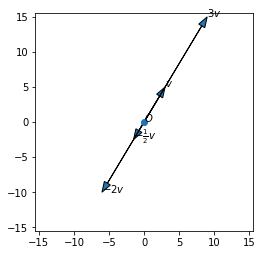

In [98]:
plt.plot(0, 0, 'o')
plt.annotate('$O$', [0, 0])
plt.arrow(0, 0, v[0], v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$v$', v)
plt.arrow(0, 0, minus_half_v[0], minus_half_v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$-\\frac{1}{2} v$', minus_half_v)
plt.arrow(0, 0, three_v[0], three_v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$3 v$', three_v)
plt.arrow(0, 0, minus_two_v[0], minus_two_v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$-2 v$', minus_two_v)
plt.axis([-15.5, 15.5, -15.5, 15.5])
plt.gca().set_aspect('equal', adjustable='box')

In [99]:
angle = math.pi / 3.   # In radians; equal to 60 degrees
A = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])
A

array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])

In [100]:
A_v = np.dot(A, v)
A_v

array([-2.83012702,  5.09807621])

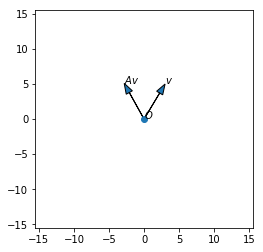

In [101]:
plt.plot(0, 0, 'o')
plt.annotate('$O$', [0, 0])
plt.arrow(0, 0, v[0], v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$v$', v)
plt.arrow(0, 0, A_v[0], A_v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$Av$', A_v)
plt.axis([-15.5, 15.5, -15.5, 15.5])
plt.gca().set_aspect('equal', adjustable='box')

In [102]:
B = 2. * A
B_v = np.dot(B, v)

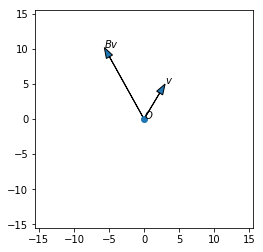

In [103]:
plt.plot(0, 0, 'o')
plt.annotate('$O$', [0, 0])
plt.arrow(0, 0, v[0], v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$v$', v)
plt.arrow(0, 0, B_v[0], B_v[1], shape='full', head_width=1, length_includes_head=True)
plt.annotate('$Bv$', B_v)
plt.axis([-15.5, 15.5, -15.5, 15.5])
plt.gca().set_aspect('equal', adjustable='box')

## Linear equations

One of the most basic and most important problems in linear algebra is finding such vector $\mathbf{x} \in \mathbb{R}^{n \times 1}$ that
$$A \mathbf{x} = \mathbf{b},$$
where $A \in \mathbb{R}^{m \times n}$ and $\mathbf{b} \in \mathbb{R}^n \times 1$. This is known as a **linear system**.

We can solve for $\mathbf{x}$ using the **Gauss-Jordan elimination**.

In [104]:
np.linalg.solve(A, [1, 2])

array([ 2.23205081,  0.1339746 ])

## The four fundamental subspaces

## Gradients and Hessians

Differentiation can be generalised to higher dimensions.

## Bibliography

1. An excellent, deeper introduction to linear algebra can be found in Professor Gilbert Strang's video lectures for the *18.06 Linear Algebra* course at MIT: https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/
1. The supporting textbook for that course is *Introduction to Linear Algebra*, 5th edition, by Gilbert Strang: https://www.amazon.co.uk/Introduction-Linear-Algebra-Gilbert-Strang/dp/0980232775/
1. Another good text on libear algebra is *Linear Algebra*, 3rd edition, by John B. Fraleigh and Raymond A. Beauregard: https://www.amazon.co.uk/Linear-Algebra-Third-Fraleigh-1995-01-10/dp/B01MXJ76GM/
1. One may also be recommended to read *Schaum's Outline of Linear Algebra*, 6th edition, by Seymour Lipschutz and Marc Lipson: https://www.amazon.co.uk/Schaums-Outline-Linear-Algebra-Outlines/dp/1260011445/
1. Finally, we recommend getting hold of *M2N1 &mdash; Numerical Analysis* lecture notes by Brad Baxter, which, in addition to theory, contain some useful exercises: http://www.cato.tzo.com/brad/M2N1/m2n1_notes.pdf